In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
import matplotlib.dates as mdates

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [65]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [66]:
# reflect an existing database into a new model
Base = automap_base()


# automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [67]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [68]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [69]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [39]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

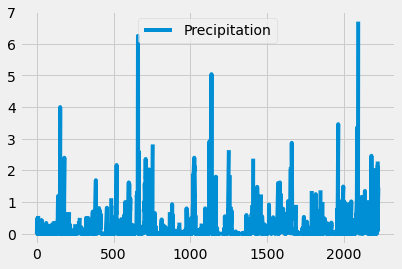

In [290]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# for row in session.query(Measurement, Measurement.date, Measurement.prcp).limit(330).all():
#     print(row)


target_date = dt.date(2017, 8, 23)
delta= dt.timedelta(days=365)
query_date = target_date - delta


h_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).order_by(Measurement.date.desc()).all()
h_prcp

h_prcp_df = pd.DataFrame(h_prcp, columns=['Date','Precipitation'])
h_prcp_df.head()
h_prcp_df.set_index('Date')

Year_prcp_df = h_prcp_df.sort_values(by='Date')
Year_prcp_df.head(10)
# h_prcp_df.sort_index(inplace=True)
# h_prcp_df.head(10)

# h_prcp_df.sort_index()

Year_prcp_df.plot(x_compat=True)

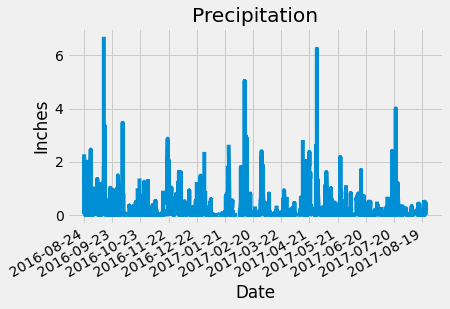

In [291]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt


Year_prcp_df = h_prcp_df.sort_values(by='Date')
Year_prcp_df.head(10)

dates = Year_prcp_df['Date']
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = Year_prcp_df["Precipitation"]


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation')
plt.tight_layout

plt.savefig('Precipitation.png')
plt.show()
plt.close()


In [27]:
Year_prcp_df = h_prcp_df.sort_values(by='Date')
Year_prcp_df.head(10)

,Date,Precipitation
2222,2016-08-24,1.45
2216,2016-08-24,0.08
2217,2016-08-24,2.15
2221,2016-08-24,2.15
2219,2016-08-24,NaN
2218,2016-08-24,2.28
2220,2016-08-24,1.22
2215,2016-08-25,0.11
2214,2016-08-25,0.06
2213,2016-08-25,0.21


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Year_prcp_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


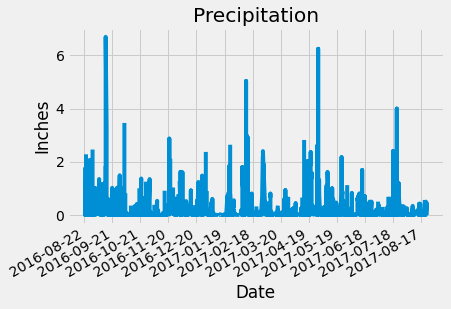

In [289]:
target_date = dt.date(2017, 8, 22)
delta= dt.timedelta(days=365)
query_date = target_date - delta


h_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).order_by(Measurement.date.desc()).all()
h_prcp

h_prcp_df = pd.DataFrame(h_prcp, columns=['Date','Precipitation'])
h_prcp_df.head()
h_prcp_df.set_index('Date')


Year_prcp_df = h_prcp_df.sort_values(by='Date')
Year_prcp_df.head(10)

dates = Year_prcp_df['Date']
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = Year_prcp_df["Precipitation"]


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation')
plt.tight_layout

plt.savefig('Precipitation2.png')
plt.show()
plt.close()


In [283]:
Year_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a query to show how many stations are available in this dataset?
# s_id = session.query(Station, Station.id).all()
session.query(func.count(Station.id)).all()

[(9)]

In [40]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
active_station
# active_station2 = session.query(Measurement.station).group_by(Measurement.station)\
#     .order_by(func.count(Measurement.station).desc()).all()
# active_station2


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# session.query(Measurement.station, func.min(Measurement.tobs)).all()
# session.query(Measurement.station, func.max(Measurement.tobs)).all()
# session.query(Measurement.id, func.min(Measurement.tobs)).all()
# 'USC00519281'
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station==active_station[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [57]:
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).filter(Measurement.date>=query_date)\
        .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519397', 366),
 ('USC00519281', 357),
 ('USC00516128', 354),
 ('USC00513117', 348),
 ('USC00519523', 342),
 ('USC00514830', 309),
 ('USC00517948', 185)]

In [43]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
active_temps
session.query(Measurement.station ==active_station[0][0], Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).all()


[(False, '2017-08-23', 81.0),
 (False, '2017-08-23', 82.0),
 (False, '2017-08-23', 82.0),
 (False, '2017-08-23', 76.0),
 (False, '2017-08-22', 82.0),
 (False, '2017-08-22', 82.0),
 (False, '2017-08-22', 76.0),
 (False, '2017-08-21', 81.0),
 (False, '2017-08-21', 79.0),
 (False, '2017-08-21', 82.0),
 (False, '2017-08-21', 76.0),
 (False, '2017-08-20', 81.0),
 (False, '2017-08-20', 80.0),
 (False, '2017-08-20', 78.0),
 (False, '2017-08-19', 79.0),
 (False, '2017-08-19', 80.0),
 (False, '2017-08-19', 85.0),
 (False, '2017-08-19', 71.0),
 (False, '2017-08-18', 80.0),
 (False, '2017-08-18', 77.0),
 (True, '2017-08-18', 79.0),
 (False, '2017-08-18', 76.0),
 (False, '2017-08-17', 78.0),
 (False, '2017-08-17', 83.0),
 (True, '2017-08-17', 76.0),
 (False, '2017-08-17', 72.0),
 (False, '2017-08-16', 82.0),
 (False, '2017-08-16', 79.0),
 (True, '2017-08-16', 76.0),
 (False, '2017-08-16', 71.0),
 (False, '2017-08-15', 78.0),
 (False, '2017-08-15', 82.0),
 (False, '2017-08-15', 79.0),
 (True, '2017

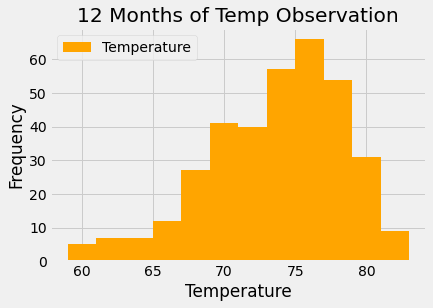

In [300]:
target_date = dt.date(2017, 8, 18)
delta= dt.timedelta(days=365)
query_date = target_date - delta

h_tob = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > query_date).order_by(Measurement.date.desc()).all()
h_tob
h_tob_df = pd.DataFrame(h_tob, columns=['Date','Temperature'])
h_tob_df.head()

ax = h_tob_df.plot.hist(title="12 Months of Temp Observation", color="orange", bins=12)
ax.set_xlabel('Temperature')
plt.tight_layout

plt.savefig('TempObservation.png')
plt.show()
plt.close()

## Bonus Challenge Assignment

In [284]:
start = "2016-8-23"
start = dt.datetime.strptime(start, "%Y-%m-%d")

results = session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
        .group_by(Measurement.date)\
        .filter(Measurement.date>=start).all()
#   * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#   * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
#   * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.
    # print(results)


temp_list = []

for i in results:
    start = {}
    start[i[0]] = {
        'TMAX' : i[2],
        'TMIN' : i[1],
        'TAVG' : i[3]
    }
    temp_list.append(start)
    
# print(temp_list)


In [100]:
start = "2015-8-23"
end = "2017-1-10"
start = dt.datetime.strptime(start, "%Y-%m-%d")
end = dt.datetime.strptime(end, '%Y-%m-%d')

# results = session.query(TMIN, TAVG, TMAX).filter(Measurement.date>=start)
results = session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.date>=start).filter(Measurement.date<=end).all()
results

[('2015-08-28', 56.0, 86.0, 74.54193748065614)]

In [120]:
start = "2017-8-13"
   
start = dt.datetime.strptime(start, "%Y-%m-%d")

results = session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.date>=start).all()
session.close()

temp_list = []

for i in results:
    start = {}
    start = {
        'TMAX' : i[2],
        'TMIN' : i[1],
        'TAVG' : i[3]
    }
    temp_list.append(start)
    
print(temp_list)

[{'TMAX': 85.0, 'TMIN': 70.0, 'TAVG': 78.475}]


In [126]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [161]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2016-09-10', '2016-09-20'))
trip = calc_temps('2016-09-10', '2016-09-20')
# print(trip.index("77.17391304347827"))
trip2 = list(np.ravel(trip))
# print(trip2.index("77.17391304347827"))
print(trip2)


[(70.0, 77.17391304347827, 83.0)]
[70.0, 77.17391304347827, 83.0]


13.0


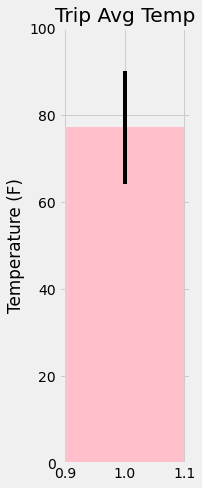

In [301]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

yerr = trip[0][2] - trip[0][0]
print(yerr)
x=1
y= trip[0][1]
plt.figure(figsize=(3, 7))


plt.bar(x, y, yerr=yerr, width=0.2, color='pink', align='center')
plt.title('Trip Avg Temp')
plt.ylim([0,100])
plt.ylabel('Temperature (F)')
plt.tight_layout()

plt.savefig('Trip_Avg_Temp.png')
plt.show()
plt.close()
# fig,ax=plt.subplots(figsize=plt.figaspect(2.))

# x=1
# y=trip[0][1]

# bar=ax.bar(x, y, yerr=yerr, alpha=0.5, color='pink', align='center')
# ax.set(xticks=range(x), xticklabels="", title='Trip Avg Temp')
# ax.set_ylabel("Temperature (F)")

# ax.margins(.2,.2)
# fig.tight_layout()
# fig.show()


In [239]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start = "2016-9-10"
end = "2017-9-20"
start = dt.datetime.strptime(start, "%Y-%m-%d")
end = dt.datetime.strptime(end, '%Y-%m-%d')
#use sum instead of count
# results = session.query(Measurement.date, Measurement.station, func.sum(Measurement.prcp)).\
#     filter(Measurement.date >=start).filter(Measurement.date<=end).group_by(Measurement.station)\
#     .order_by(func.sum(Measurement.prcp).desc()).all()

# results

results = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,\
     Station.elevation, func.sum(Measurement.prcp)).outerjoin(Measurement, Measurement.station == Station.station).\
    filter(Measurement.date >=start).filter(Measurement.date<=end).group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()

# Measurement.date,'Date' : i[0],
# results
trip_prcp_list = []

for i in (results):
    trip_prcp = {}
    trip_prcp[i[0]] = {        
        'Station' : i[1],
        'Prcp' : i[5],
        'latitude' : i[2],
        'longitude' : i[3],
        'elevation' : i[4]
    }

    trip_prcp_list.append(trip_prcp)   

print(trip_prcp_list)


# results = session.query(Measurement.date, Measurement.station, Station.name, Station.latitude, Station.longitude,\
#      Station.elevation, func.count(Measurement.prcp)).outerjoin(Measurement, Measurement.station == Station.station).\
#     filter(Measurement.date >=start).filter(Measurement.date<=end).group_by(Measurement.station)\
#     .order_by(func.count(Measurement.prcp).desc()).all()

# results


[{'USC00516128': {'Station': 'MANOA LYON ARBO 785.2, HI US', 'Prcp': 134.39999999999998, 'latitude': 21.3331, 'longitude': -157.8025, 'elevation': 152.4}}, {'USC00519281': {'Station': 'WAIHEE 837.5, HI US', 'Prcp': 63.80000000000001, 'latitude': 21.45167, 'longitude': -157.84888999999998, 'elevation': 32.9}}, {'USC00513117': {'Station': 'KANEOHE 838.1, HI US', 'Prcp': 44.89000000000003, 'latitude': 21.4234, 'longitude': -157.8015, 'elevation': 14.6}}, {'USC00519523': {'Station': 'WAIMANALO EXPERIMENTAL FARM, HI US', 'Prcp': 34.80999999999999, 'latitude': 21.33556, 'longitude': -157.71139, 'elevation': 19.5}}, {'USC00514830': {'Station': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'Prcp': 29.930000000000014, 'latitude': 21.5213, 'longitude': -157.8374, 'elevation': 7.0}}, {'USC00519397': {'Station': 'WAIKIKI 717.2, HI US', 'Prcp': 15.679999999999987, 'latitude': 21.2716, 'longitude': -157.8168, 'elevation': 3.0}}, {'USC00517948': {'Station': 'PEARL CITY, HI US', 'Prcp': 4.529999999999999,

In [267]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [250]:
zero = daily_normals('09-10')
one = daily_normals("09-11")
two = daily_normals('09-12')
three = daily_normals("09-13")
four = daily_normals('09-14')
five = daily_normals("09-15")
six = daily_normals('09-16')
seven = daily_normals("09-17")
eight = daily_normals('09-18')
nine = daily_normals("09-19")
ten = daily_normals('09-20')
print(zero, one, two, three, four, five, six, seven, eight, nine, ten)

[(67.0, 76.61224489795919, 85.0)] [(70.0, 76.69565217391305, 83.0)] [(68.0, 75.89795918367346, 85.0)] [(68.0, 75.875, 82.0)] [(69.0, 75.98076923076923, 85.0)] [(67.0, 76.14, 81.0)] [(70.0, 77.40384615384616, 86.0)] [(68.0, 76.57692307692308, 83.0)] [(67.0, 75.85106382978724, 84.0)] [(68.0, 76.34693877551021, 87.0)] [(69.0, 76.14583333333333, 83.0)]


In [254]:
zero = daily_normals('09-10')
one = daily_normals("09-11")
two = daily_normals('09-12')
three = daily_normals("09-13")
four = daily_normals('09-14')
five = daily_normals("09-15")
six = daily_normals('09-16')
seven = daily_normals("09-17")
eight = daily_normals('09-18')
nine = daily_normals("09-19")
ten = daily_normals('09-20')
normal = [zero, one, two, three, four, five, six, seven, eight, nine, ten]
# normals = []
# for i in range(len(normal)):
    
#     normals.append(normal)
# print(normals)

# need to add and if/else statement or a value=1 thing

In [281]:

date_list =['09-10', '09-11', ('09-12'), ('09-13'), ('09-14'), ('09-15'), ('09-16'), ('09-17'), ('09-18'), ('09-19'), ('09-20')]
normal2 = []
for i in date_list:
    norm_min = daily_normals(i)[0],
#     norm_avg = daily_normals(i)[1],
#     norm_max = daily_normals(i)[2]
    normal2.append(norm_min)
#     normal2.append(norm_avg)
#     normal2.append(norm_max)
    
print(normal2)

[((67.0, 76.61224489795919, 85.0),), ((70.0, 76.69565217391305, 83.0),), ((68.0, 75.89795918367346, 85.0),), ((68.0, 75.875, 82.0),), ((69.0, 75.98076923076923, 85.0),), ((67.0, 76.14, 81.0),), ((70.0, 77.40384615384616, 86.0),), ((68.0, 76.57692307692308, 83.0),), ((67.0, 75.85106382978724, 84.0),), ((68.0, 76.34693877551021, 87.0),), ((69.0, 76.14583333333333, 83.0),)]


In [ ]:
# calculate the daily normals for your trip
daily_normals
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [262]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('stock', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()
# normals = list(np.ravel(normal))
# normals
df = pd.DataFrame(normal, columns=['temp'])
df.head()

,temp
0,"(67.0, 76.61224489795919, 85.0)"
1,"(70.0, 76.69565217391305, 83.0)"
2,"(68.0, 75.89795918367346, 85.0)"
3,"(68.0, 75.875, 82.0)"
4,"(69.0, 75.98076923076923, 85.0)"


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
